# Making things work

Up to this point, we have mainly worked with small problems. This is constructive but it does not illustrate the full power of (deep) neural networks, nor does it point out some of the problems that need to be overcome when solving largescale problems.

We have pointed out before that neural networks have been around for a long time, but it is only relatively recently that it became possible to solve largescale problems. We referred to the importance of the availability of large datasets in these developments. Now, we turn to some of the algorithmic advances that made this possible.

Interestingly enough, it is not as if someone suddenly had a fantastic new idea that changed the world. (One should, however, not underestimate the more recent, truly innovative ideas that have emerged.) It was more a question of learning how to make a number of small innovative steps work together. We have already pointed out the importance of regularization to prevent overfitting. 

Here we wish to point out four more ideas:

1. Dropout
2. Activation functions
3. Initialization of the weights
4. Stochastic gradient descent and mini-batch training

----
## Dropout

<br><br>


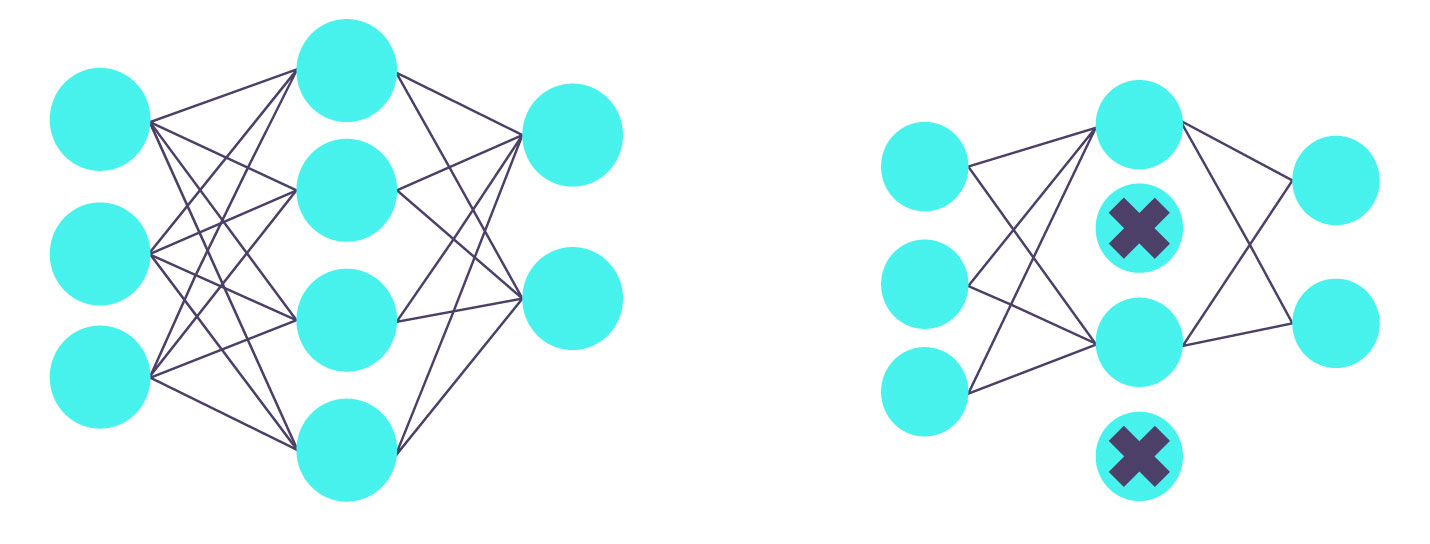

<p>Dropout was introduced in 2014 by [Hinton](http://jmlr.org/papers/volume15/srivastava14a.old/srivastava14a.pdf) and co-workers as a means to prevent overfitting. Again they took their cue from biology, "*A motivation for dropout comes from a theory of the role of sex in evolution (Livnat et al.,
2010). Sexual reproduction involves taking half the genes of one parent and half of the
other, adding a very small amount of random mutation, and combining them to produce an
offspring. The asexual alternative is to create an offspring with a slightly mutated copy of
the parent’s genes. It seems plausible that asexual reproduction should be a better way to
optimize individual fitness because a good set of genes that have come to work well together
can be passed on directly to the offspring. On the other hand, sexual reproduction is likely
to break up these co-adapted sets of genes, especially if these sets are large and, intuitively,
this should decrease the fitness of organisms that have already evolved complicated coadaptations.
However, sexual reproduction is the way most advanced organisms evolved."* (Hinton, et al., 2014).</p>
<p> The two images (above) demonstrate how this idea was implemented in neural networks. The image on the left is a standard feedforward network where three neurons are fed into four, which in turn, are fed into two output neurons. The second image shows how a 50% dropout is implemented. Given the dropout rate for a specific layer – 50% in this case – that percentage of randomly chosen neurons is temporarily turned off, of course, together with their connecting weights. Since the active neurons are no longer able to rely on their neighbors, they must become as useful as possible themselves.</p>

<p>Note that this only happens during training. Once the neural network is fully trained, all the neurons become active. Since twice as many neurons are now in use as during training, the weights are divided by two. </p>

----
## Activation Functions


<br>
<figure> 
<figcaption>**Sigmoid Activation Function**</figcaption>
<img src="./images/sigmoid.png"
     width=300px
     alt="sigmoid"
     style="float: left"/>   
</figure>

<p>The sigmoid activation function was, for a long time, a favorite as an activation function. However, it turned out to be very hard, if not impossible to train for deep neural networks. The problem is that its gradient vanishes for input values away from zero, as should be clear from Figure 8. Since the magnitude of the gradient determines how much the weights are updated during gradient descent, vanishing gradients mean no update, hence no training. We will discuss this issue in much more detail in a later module when we look at the mechanics of backpropagation.</p>

<br><br><br><br><br>

<br>
<figure> 
<figcaption>**ReLU Activation Function**</figcaption>
<img src="./images/ReLU.png"
     width=300px
     alt="ReLU"
     style="float: left"/>   
</figure>

<p> Nair and Hinton proposed the rectifying linear unit [Nair and Hinton](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.165.6419&rep=rep1&type=pdf), its efficacy subsequently demonstrated by  [Xu et al ](https://arxiv.org/pdf/1505.00853.pdf). It should be clear that it largely eliminates the vanishing gradient problem, most definitely for positive inputs. It remains a popular activation function.</p>

<br><br><br><br><br><br>

<br>
<figure> 
<figcaption>**Leaky ReLU Activation Function**</figcaption>
<img src="./images/leaky_ReLU.png"
     width=300px
     alt="Leaky ReLU"
     style="float: left"/>   
</figure>

<p> One weakness of ReLU is that it may suffer from "dying" neurons. If the weighted sum of the neuron's inputs is negative, its output becomes zero. Since the gradient is zero for zero inputs, it is possible that a 'dead' neuron will not come back to life. Xu et al showed that the so-called *leaky* ReLU's outperforms standard ReLU.  Instead of using $\max(0,z)$ as in ReLU, leaky ReLU uses $\max(\alpha z, z)$, with $\alpha$ determining the amount of 'leaking'. Leaky ReLU is shown in the figure on the left. The  small gradient for negative inputs allows for the possibility that neurons can always come back to life.</p>

<br><br>


<br>
<figure> 
<figcaption>**ELU Activation Function**</figcaption>
<img src="./images/ELU.png"
     width=300px
     alt="ELU"
     style="float: left"/>   
</figure>
<p> The final activation function that should be mentioned is the Exponential Linear Unit of [Clevert et al](https://arxiv.org/pdf/1511.07289.pdf), defined by 
    $$\mbox{ELU}(z)=\left\{ \begin{array}{ll} \alpha (\exp(z)-1) & \mbox{ if } z < 0\\
                                                z                & \mbox{ if } z \geq 0
                                                \end{array}\right.
    $$
Its main drawback is that it is more expensive to calculate than the activation function mentioned above.</p>

<br><br><br><br>


----
## Initialization of the weights


<p>It remains something of a minor miracle that we are able to train very large neural networks at all. Not only are we working in very high dimensional spaces – that is, we may need to train millions of parameters – but the optimization space should be highly convoluted (for example, riddled with local optima). Using gradient descent, we select an initial set of weights and then slide downhill until we reach the nearest local minimum. How can we ensure that we often end up in a good local minimum to make the effort worthwhile? One key ingredient is surely the initialization.
 </p>

<p>Although there is no general theory, the seminal paper by [Xavier Glorot and Josua Bengio](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf), showed the importance of initialization strategies. The authors argued that one should have the variance of the output neurons to be roughly equal to the variance of the input layers.</p>

<p> While the paper by Glorot and Bengio was mainly concerned with the sigmoid activation function, [He et al](https://arxiv.org/pdf/1502.01852.pdf) also investigated the  ReLU activation. Both papers show that a random initialization, typically using a normal distribution, with the variance constrained by the number of input neurons, vastly improves training.</p>

The following table gives the appropriate initializations for roughly equal numbers of input and output neurons.
    
 | Activation  ||Standard deviation|
 |---||---|
 |Sigmoid|| $\sigma=\frac{1}{\sqrt{n_{inputs}}}$
 |ReLU||    $\sigma = \sqrt{\frac{2}{n_{inputs}}}$


----
## Mini-batch training

<p>Let’s pause for a moment and reflect on how we have done our training thus far. For each optimization step, all the data is passed through the network to calculate the objective function. Then, we do a backward pass to calculate the gradients. Since it becomes quite technical, a more in-depth discussion of backpropagation is postponed to a later module. The crucial point is that it is expensive to pass all the data through the network for each update step. One easy way to remedy this is to use only part of the data for each update step. This is known as batch training. Once one has decided on an appropriate batch size (another hyperparameter), one can then take a random sample of the data of the appropriate size. Once one has passed through all the data, it is the end of an epoch. Note that for each batch, one update step is calculated. Thus, one epoch may consist of many update steps. Taken to the extreme, a batch consisting of only a single data value is known as stochastic gradient descent.
</p>

<p> It should be noted that smaller batch sizes leads to more erratic training, i.e. the value of the objective function will not decrease in a smooth manner. This might not be entirely undesirable as the stochasticity inherent in small batch sizes might be helpful to get out of local minima, or advance the training in regions where the optimization surface become flat.</p>

<p> Although it is not necessary to extract your own random batches (tensorflow to the rescue) it may be of interest to reflect on how you will go about implementing it.</p>

<p> Finally one should note the ideas of [Ioffe and Szegedy](https://arxiv.org/pdf/1502.03167.pdf) regarding batch normalization. Their idea is to add an operation just before the activation function is applied to center and normalize the inputs. This only happens during training as we don't use mini-batches during testing, instead one uses the empirical mean and standard deviation of the whole training set. These are estimated during training and are stored together with the rest of the neural network parameters.</p>

---
# MINST classification using one hidden layer

In this notebook we add a hidden layer as well as dropout and regularization to the basic SoftMax classifier.

**Note:** With the parameter values used here, we don’t get very different results. If, however, we get significantly worse results with dropout and regularization, this is likely because our model isn't overfitting the data, and when we add regularisation or dropout, we are 
increasing the bias/underfitting the model. Hence, the worse performance.

## Modification for dropout

The main modification required by dropout is to distinguish between training and predicting. Dropout is only employed during training and since we want to use the same computational graph for training and testing we need to let it know when we are training. This is done by defining a **training** placeholder that has the default value **False**. During the training cycle it is set set to **True** through a dictionary feed. 

During the construction phase, the compuational graph is constructed. In this case, we'll define different functions to help us achieve this.

During the execution phase, data is passed to the computational graph and the appropriate ops are executed

### Import modules

In [1]:
# Imports
import tensorflow as tf
import numpy as np
import IPython.display
from sklearn.metrics import confusion_matrix

from ipywidgets import interact
from matplotlib import pylab as plt
%matplotlib inline

/Users/herbst/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Import the data

The MNIST data is available in TensorFlow and provides a useful helper function for feeding it in mini-batches.

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
images = mnist.train.images.reshape((-1, 28, 28))
def show_weights(k=0):
    """
    Show the weights for the 10 digits.
    """
    plt.imshow(images[k], cmap='viridis') 
    plt.title('The weigths associated with digit ' + str(k))
    plt.show()
    
w = interact(show_weights, k =(0, 100)) 

interactive(children=(IntSlider(value=0, description='k'), Output()), _dom_classes=('widget-interact',))

## Construction phase

**Adding a dropout layer as well as regularization of the weights:**

* Introduce L1 regularization of the weights.
* Use the same nonlinear layer as in the previous problem (See notes on neural net classification), but now add a dropout layer after it.
* Display your results as a confusion matrix, as before.

**Helpful hint for Regularization**:
* tf.layers.dense takes an argument, kernel_regularizer, that specifies the regularizer you want to use. Report your results using  the l1 regularizer, but do experiment with the l2 regularizer as well.

**Helpful hints for Dropout:**
* Dropout is only used during training, not during testing when all the weights are restored
* This means that you will need to tell TensorFlow when you train. There are two things you need to do: <br> 
**First**: Add another placeholder called **training** during the construction phase, like so: training = tf.placeholder_with_default(False, shape=(), name="training").<br> 
**Second**: You need to add a dropout layer *after* the activation was applied in the dense layer, like so: drop = tf.layers.dropout(hidden_layer_1, dropout_rate, training=training). 
* You will then set training to be True during training. If not specified, it will take its default value of False.
* Note that you also need to set the dropout rate. Use 0.5.

In [8]:
# Construction
# ============
tf.reset_default_graph()

# Specify the hyperparameters
# The MNIST images
height = 28
width = 28
channels = 1
n_inputs = height * width  

n_hidden_1 = 64  # The hidden, nonlinear layer
dropout_rate = 0.5  # Dropout rate
scale = 0.001  # The regularization
n_outputs = 10  # Output layer

with tf.name_scope("Inputs"):    
    X = tf.placeholder(tf.float32, shape=(None,n_inputs), name="X")
    y = tf.placeholder(tf.float32, shape=(None,n_outputs), name="y")
    training = tf.placeholder_with_default(False, shape=(), name="training")

# Also add l2 regularization to the dense layer
with tf.name_scope("Fc"):
    fc_1 = tf.layers.dense(X, n_hidden_1, activation = tf.nn.relu, 
               kernel_regularizer=tf.contrib.layers.l2_regularizer(scale), 
               name="fc")

with tf.name_scope("dropout"):  
    drop_1 = tf.layers.dropout(fc_1, dropout_rate, training=training)
    
with tf.name_scope("output"):
    logits = tf.layers.dense(drop_1, n_outputs, name="output")
    Y_prob = tf.nn.softmax(logits, name="Y_prob")

with tf.name_scope("train"):
    xentropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y, name="xentropy")
    
    # Do not forget to add the reglarization loss to the standard loss
    loss = tf.reduce_mean(xentropy, name='loss') + tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)
    
with tf.name_scope("eval"):
    correct = tf.equal(tf.argmax(logits,axis=1), tf.argmax(y,axis=1))
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

with tf.name_scope("init"):
    init_op = tf.global_variables_initializer()  

## Execution phase

In [9]:
n_epochs = 50
batch_size = 50

# Execution
# =========
with tf.Session() as sess:
    sess.run(init_op)
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)            
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
            
        acc_train = accuracy.eval(feed_dict={X: mnist.train.images, y: mnist.train.labels})
        acc_test  = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, ",  Test accuracy:", acc_test)   
    
    # Get the predictions on the test set
    labels = sess.run(Y_prob, feed_dict={X: mnist.test.images, y: mnist.test.labels})

0 Train accuracy: 0.9389273 ,  Test accuracy: 0.9392
1 Train accuracy: 0.9562182 ,  Test accuracy: 0.9543
2 Train accuracy: 0.9641455 ,  Test accuracy: 0.9609
3 Train accuracy: 0.97034544 ,  Test accuracy: 0.9642
4 Train accuracy: 0.97441816 ,  Test accuracy: 0.9671
5 Train accuracy: 0.9743818 ,  Test accuracy: 0.9668
6 Train accuracy: 0.9774182 ,  Test accuracy: 0.969
7 Train accuracy: 0.9809091 ,  Test accuracy: 0.9727
8 Train accuracy: 0.97810906 ,  Test accuracy: 0.9697
9 Train accuracy: 0.9816909 ,  Test accuracy: 0.9709
10 Train accuracy: 0.98334545 ,  Test accuracy: 0.9741
11 Train accuracy: 0.9818 ,  Test accuracy: 0.971
12 Train accuracy: 0.9837091 ,  Test accuracy: 0.9742
13 Train accuracy: 0.9814182 ,  Test accuracy: 0.9716
14 Train accuracy: 0.9844364 ,  Test accuracy: 0.973
15 Train accuracy: 0.9845091 ,  Test accuracy: 0.9728
16 Train accuracy: 0.98556364 ,  Test accuracy: 0.9719
17 Train accuracy: 0.9848545 ,  Test accuracy: 0.9736
18 Train accuracy: 0.9883636 ,  Test ac

#### Show the values of the confusion matrix

In [6]:
# Get the true and predicted labels in the correct format
t_true = np.argmax(mnist.test.labels, axis=1)
t_predict = np.argmax(labels, axis=1)

# Get the confusion matrix.
cm = confusion_matrix(t_true, t_predict)

In [7]:
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[ 972    0    2    0    1    0    1    1    3    0]
 [   0 1123    0    3    1    1    1    0    5    1]
 [   6   11  995    1    6    0    2    5    6    0]
 [   2    2   17  961    1   10    0    7    8    2]
 [   1    0    3    0  960    0    3    0    0   15]
 [  12    2    5   12    3  833    9    1   12    3]
 [  14    3    1    0   23    5  908    0    4    0]
 [   5   10   20    5   10    0    0  961    4   13]
 [   9    3    4    1    2    3    4    1  945    2]
 [   3    3    0    0   13    8    1    4    4  973]]


**Conclusion:** Regularization has not made too much of a difference.